<a href="https://colab.research.google.com/github/geunsu-jo/Hands-On-ML/blob/main/winter_semester/06_%ED%8F%89%EA%B0%80(2020_12_30).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 평가

In [ ]:
import numpy as np

In [ ]:
from sklearn.datasets import load_boston, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR

## 회귀

In [ ]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
print(f"학습 : {model.score(X_train, y_train)}")
print(f"예측 : {model.score(X_test, y_test)}")

학습 : 0.7047992142321096
예측 : 0.6632127479839143


In [ ]:
# 예측
predict = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f"mean_absolute_error : {mean_absolute_error(y_test, predict)}")
print(f"mean_squared_error : {mean_squared_error(y_test, predict)}")
# RMSE
print(f"root_mean_squared_error : {np.sqrt(mean_squared_error(y_test, predict))}")

mean_absolute_error : 3.3540477429148856
mean_squared_error : 28.741186462963977
root_mean_squared_error : 5.361080717818375


## 분류

In [ ]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# ROC/AUC 곡선을 그리기 위해서 확률계산이 필요하므로 probability=True를 지정해주세욤 :D
model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)

predict = model.predict(X_test)

accuracy_score : 0.951048951048951
[[49  2]
 [ 5 87]]
precision_score : 0.9775280898876404
recall_score : 0.9456521739130435
f1_score : 0.9613259668508287
roc_auc_score : 0.9532182438192668


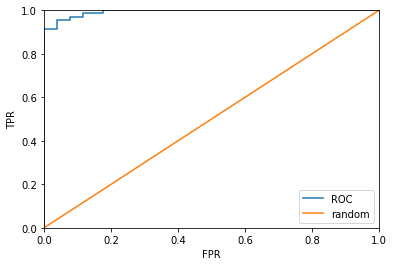

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
# 1. 정확도
print(f"accuracy_score : {accuracy_score(y_test, predict)}")

# 2. 오차행렬
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predict)
print(conf_matrix)

# 3. 정밀도와 재현율
print(f"precision_score : {precision_score(y_test, predict)}")
print(f"recall_score : {recall_score(y_test, predict)}")

# 4. F1-score
print(f"f1_score : {f1_score(y_test, predict)}")

# 5. ROC/AUC
print(f"roc_auc_score : {roc_auc_score(y_test, predict)}")

import matplotlib.pyplot as plt

# 분류가 1인 친구들 모음
pred_proba_class1 = model.predict_proba(X_test)[:, 1]
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# 시각화 시작
plt.plot(fprs, tprs, label='ROC')
plt.plot([0,1], [0,1], label='random')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()